# Matrix Multiplication as Transformation

## Motivation

Vectors represent points or directions in space.<br>
In many problems, we want to transform vectors in a systematic way, for example by scaling, rotating, or shearing them.

A matrix is not just a table of numbers.<br>
It represents a function that maps one vector to another while preserving linear structure.

Understanding matrix multiplication as the composition of such transformations explains why the multiplication rule is defined the way it is.


## Key Idea: Matrices as Functions on Vectors

A matrix acts on a vector to produce a new vector.
This action represents a linear transformation of space.

Instead of asking how to multiply matrices,<br>
we first ask: what should a transformation do to vectors?


## What Should a Linear Transformation Do?

A transformation that acts on vectors should satisfy two natural properties:

1. **Additivity**  
   Transforming the sum of two vectors should be the same as summing their individual transformations.

2. **Homogeneity (scaling)**  
   Scaling a vector before transforming it should be the same as scaling the transformed vector.

Mathematically, for a transformation T:

$$
T(\mathbf{u} + \mathbf{v}) = T(\mathbf{u}) + T(\mathbf{v}), \quad
T(c\,\mathbf{v}) = c\,T(\mathbf{v})
$$

Any transformation satisfying these properties is called **linear**.


## Why Basis Vectors Are Enough

Any vector in two-dimensional space can be written as a linear combination of the standard basis vectors:

$$
\mathbf{v} = x\,\mathbf{e}_1 + y\,\mathbf{e}_2
$$

where

$$
\mathbf{e}_1 = \begin{bmatrix}1 \\ 0\end{bmatrix}, \quad
\mathbf{e}_2 = \begin{bmatrix}0 \\ 1\end{bmatrix}
$$

If we know how a linear transformation acts on these basis vectors, then its action on every other vector is completely determined.


## From Transformations to Matrices

Suppose a linear transformation T sends the basis vectors to:

$$
T(\mathbf{e}_1) = \mathbf{a}, \quad
T(\mathbf{e}_2) = \mathbf{b}
$$

We can represent this transformation by placing these images as columns
of a matrix:

$$
A = \begin{bmatrix} \mathbf{a} & \mathbf{b} \end{bmatrix}
$$

Applying the transformation to any vector
$\mathbf{v} = x\,\mathbf{e}_1 + y\,\mathbf{e}_2$ gives:

$$
T(\mathbf{v}) = x\,\mathbf{a} + y\,\mathbf{b}
$$

This is exactly what matrix–vector multiplication computes.


## Matrix–Vector Multiplication

Let a linear transformation be represented by the matrix

$$
A = \begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
$$

The columns of \(A\) represent where the transformation sends the
basis vectors:

$$
T(\mathbf{e}_1) =
\begin{bmatrix}
a_{11} \\
a_{21}
\end{bmatrix},
\quad
T(\mathbf{e}_2) =
\begin{bmatrix}
a_{12} \\
a_{22}
\end{bmatrix}
$$

For any vector $\mathbf{v} = \begin{bmatrix}x \\ y\end{bmatrix}$,
linearity implies:

$$
T(\mathbf{v}) = x\,T(\mathbf{e}_1) + y\,T(\mathbf{e}_2)
$$

Substituting the column vectors gives:

$$
A\mathbf{v} =
\begin{bmatrix}
a_{11}x + a_{12}y \\
a_{21}x + a_{22}y
\end{bmatrix}
$$

This is the matrix–vector multiplication rule.


## Interpretation

Matrix–vector multiplication computes a linear combination of the matrix columns, with weights given by the vector components.

Each output vector is formed by mixing the transformed basis vectors.


In [1]:
import numpy as np

A = np.array([[2, 0],
              [0, 1]])

v = np.array([3, 4])

A@v


array([6, 4])

In the above example, the linear transformation sends the standard basis vectors as follows:
$$
T(\mathbf{e}_1) = \begin{bmatrix}2 \\ 0\end{bmatrix}, \quad
T(\mathbf{e}_2) = \begin{bmatrix}0 \\ 1\end{bmatrix}.
$$

This means the transformation scales the \(x\)-direction by a factor of \(2\) while leaving the \(y\)-direction unchanged.

For any vector
$$
\mathbf{v} = x\,\mathbf{e}_1 + y\,\mathbf{e}_2,
$$
linearity implies
$$
T(\mathbf{v}) = x\,T(\mathbf{e}_1) + y\,T(\mathbf{e}_2)
= x\begin{bmatrix}2 \\ 0\end{bmatrix}
+ y\begin{bmatrix}0 \\ 1\end{bmatrix}
= \begin{bmatrix}2x \\ y\end{bmatrix}.
$$

Thus, under this transformation, the first component of $\mathbf{v}$ is multiplied by $2$, while the second component remains unchanged.


## Composition of Linear Transformations

In practice, transformations are often applied sequentially.<br>
For example, a vector may be scaled first and then rotated.

If $T_1$ and $T_2$ are linear transformations, their composition
$T_2 \circ T_1$ is defined as:
$$
(T_2 \circ T_1)(\mathbf{v}) = T_2(T_1(\mathbf{v}))
$$

The composition of two linear transformations is itself a linear transformation.


## Why Matrix Multiplication Exists

Let matrix $A$ represent a linear transformation $T_1$, and matrix $B$
represent another linear transformation $T_2$.

Applying $T_1$ followed by $T_2$ to a vector $\mathbf{v}$ gives:
$\mathbf{v} \xrightarrow{T_1} A\mathbf{v} \xrightarrow{T_2} B(A\mathbf{v})$.

Since the composition of two linear transformations is itself a linear
transformation, there must exist a single matrix $C$ such that:

$B(A\mathbf{v}) = C\mathbf{v}$.

The matrix $C$ represents the composition of the two transformations.
This requirement is the reason matrix multiplication is defined.



## Columns Determine Matrix Multiplication

To determine the matrix $C$, it is sufficient to examine how the
composition acts on the basis vectors.

For each basis vector $\mathbf{e}_i$:
$C\mathbf{e}_i = B(A\mathbf{e}_i)$.

This means that:
- the transformation $A$ is applied first to $\mathbf{e}_i$,
- the transformation $B$ is then applied to the result.

Therefore, the $i$-th column of $C$ is obtained by applying $B$ to the
$i$-th column of $A$.

Matrix multiplication is thus completely determined by how transformations
act on basis vectors.


## Matrix–Matrix Multiplication Rule

From the column-based interpretation, the product $C = BA$ satisfies
the component-wise formula:

$C_{ij} = \sum_k B_{ik} A_{kj}$.

This rule ensures that multiplying matrices corresponds exactly to
composing the linear transformations they represent.


In [2]:
import numpy as np

A = np.array([[2, 0],
              [0, 1]])

B = np.array([[1, 1],
              [0, 1]])

v = np.array([3, 4])

B @ (A @ v), (B @ A) @ v


(array([10,  4]), array([10,  4]))

As shown by above example,<br>
Applying $A$ first and then $B$ produces the same result as applying
the single matrix $BA$ to the vector $\mathbf{v}$.


## Visualizing Linear Transformations in 2D


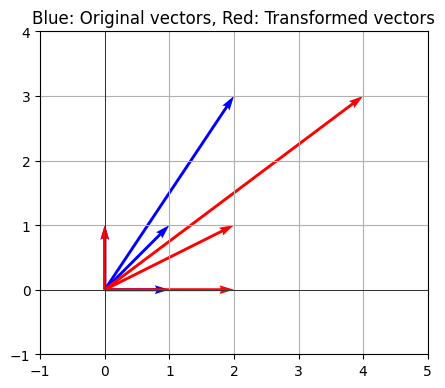

In [3]:
import numpy as np
import matplotlib.pyplot as plt

vectors = np.array([
    [1, 0],
    [0, 1],
    [1, 1],
    [2, 3]
])

#The transformation Matrix
A = np.array([
    [2, 0],
    [0, 1]
])

transformed = vectors @ A.T #Taken transpose for storing matrix as 2 x 4 matrix, making multiplication correct


plt.figure(figsize=(5, 5))

# Original vectors
for v in vectors:
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='blue')

# Transformed vectors
for v in transformed:
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='red')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.xlim(-1, 5)
plt.ylim(-1, 4)
plt.gca().set_aspect('equal', adjustable='box')

plt.title("Blue: Original vectors, Red: Transformed vectors")
plt.grid(True)
plt.show()



## Visualizing Linear Transformations in 2D

The effect of a matrix can be understood by observing how it transforms a set of vectors in the plane. 

The blue vectors represent the original vectors, while the red vectors represent the transformed vectors.

## Summary

Matrices represent linear transformations of space.

Matrix–vector multiplication applies a transformation to a vector,<br>
while matrix–matrix multiplication represents the composition of transformations.
 
Understanding matrices from this perspective explains why the multiplication rules are defined the way they are.

These ideas form the mathematical foundation for many machine learning models, where matrices represent transformations applied to data.
